# 시각화 분석

In [2]:
import pandas as pd

In [10]:
df_bus_card_tot  = pd.read_csv("./02_data_통합본/df_bus_card_tot.csv")

In [11]:
len(df_bus_card_tot)

1057872

# 데이터 시각화 분석

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import  font_manager, rc
import platform

plt.rc('font', family = "Malgun Gothic")

### 1. 기준월 및 기준일자별 버스 이용량 분석비교

사용할 분석 요소:  기분월, 기준일, 승객구분<br>
사용할 함수 : 카운트(빈도)

In [17]:
df_bus_card_tot.head(1)

,승차시각,하차시각,승객구분,환승여부,추가운임여부,승차정류장,하차정류장,버스체류시간(분),기준월,기준일,기준시간,기준분
0,2020-03-27 05:14:12,2020-03-27 05:17:14,일반,N,N,문덕사거리,성우오토모티브,3,3,27,5,14


In [37]:
# 피봇테이블 만들기
df_pivot =df_bus_card_tot.pivot_table(values = "승객구분"
                                             , index = "기준월"
                                             , columns = "기준일"
                                             ,aggfunc ="count").fillna(0)

df_pivot.head()

기준일,1,2,3,4,5,6,7,8,9,10,...,21,22,24,25,26,27,28,29,30,31
기준월,,,,,,,,,,,,,,,,,,,,,
1,18738.0,16185.0,16614.0,12556.0,19054.0,15494.0,25976.0,15808.0,16788.0,0.0,...,17324.0,34494.0,9125.0,0.0,15562.0,5472.0,0.0,16046.0,31784.0,16202.0
2,11810.0,8547.0,0.0,15507.0,44757.0,0.0,15715.0,34113.0,0.0,31194.0,...,9084.0,5657.0,5938.0,4477.0,10694.0,5422.0,5491.0,3758.0,0.0,0.0
3,2402.0,6545.0,28485.0,11956.0,5830.0,12304.0,4114.0,2827.0,0.0,5345.0,...,0.0,0.0,0.0,131.0,2897.0,4983.0,3875.0,2484.0,0.0,4992.0


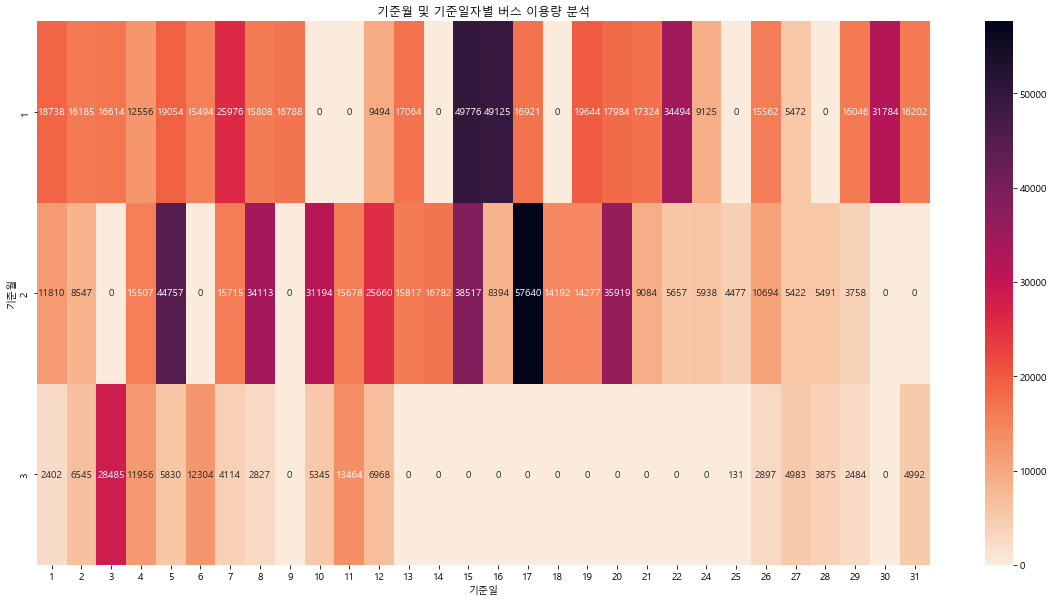

In [40]:
#그래프 그리기
plt.figure(figsize = (20, 10))

#피봇 데이터 넣어서 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap ="rocket_r")

#타이틀 넣기
plt.title("기준월 및 기준일자별 버스 이용량 분석" )


#보여주기
plt.show()

### 2. 기준일별 시간대별 버스 이용량 분석

In [41]:
# 피봇테이블 만들기
df_pivot =df_bus_card_tot.pivot_table(values = "승객구분"
                                             , index = "기준일"
                                             , columns = "기준시간"
                                             ,aggfunc ="count").fillna(0)

df_pivot.head()

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,0.0,332.0,944.0,1184.0,2048.0,1849.0,2075.0,2287.0,2505.0,2500.0,2576.0,2618.0,2362.0,2385.0,2067.0,1561.0,1373.0,1228.0,867.0,189.0
2,0.0,200.0,684.0,1424.0,2103.0,2139.0,2119.0,2301.0,2295.0,2420.0,2416.0,2538.0,2297.0,2242.0,1889.0,1203.0,1085.0,1009.0,762.0,151.0
3,0.0,413.0,1356.0,2693.0,3359.0,3154.0,3195.0,3263.0,3148.0,3331.0,3351.0,3475.0,3319.0,3026.0,2863.0,1597.0,1239.0,1143.0,967.0,207.0
4,0.0,322.0,1163.0,2215.0,2725.0,2640.0,2805.0,2878.0,3025.0,3012.0,2960.0,3111.0,3072.0,2946.0,2347.0,1410.0,1233.0,1155.0,824.0,176.0
5,0.0,511.0,1666.0,3247.0,4411.0,4588.0,4776.0,4915.0,5265.0,5456.0,5414.0,5663.0,5315.0,5033.0,4398.0,2651.0,2307.0,2315.0,1466.0,244.0


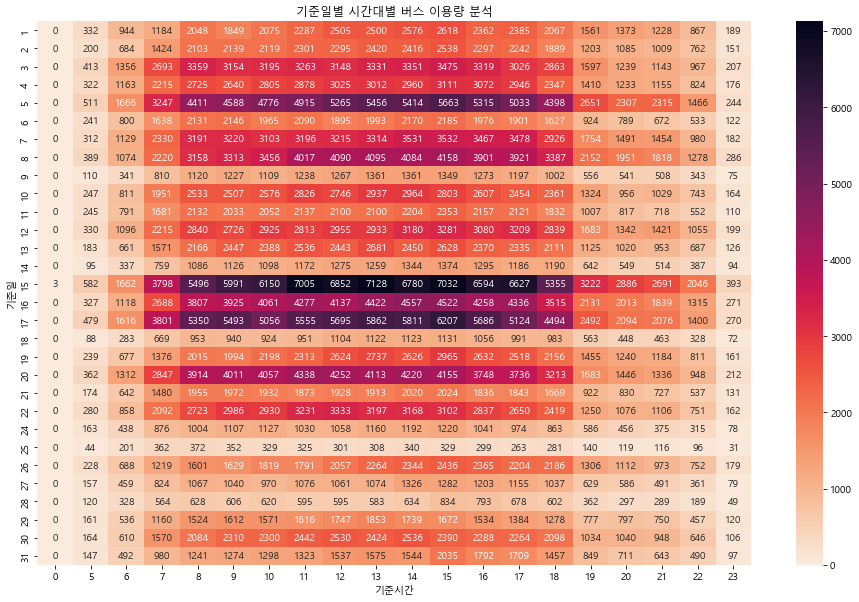

In [42]:
#그래프 그리기
plt.figure(figsize = (16, 10))

#피봇 데이터 넣어서 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap ="rocket_r")

#타이틀 넣기
plt.title("기준일별 시간대별 버스 이용량 분석" )


#보여주기
plt.show()

### 3. 기준시간 및 분별 버스 이용량 분석

In [49]:
df_pivot = df_bus_card_tot.pivot_table(values = "승객구분"
                                     ,index = "기준시간"
                                     ,columns = "기준분"
                                     ,aggfunc ="count").fillna(0)
df_pivot

기준분,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
기준시간,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,215.0,341.0,238.0,250.0,247.0,315.0,244.0,291.0,358.0,316.0
6,300.0,308.0,253.0,281.0,327.0,305.0,296.0,329.0,302.0,446.0,...,505.0,608.0,481.0,441.0,527.0,459.0,500.0,502.0,603.0,579.0
7,532.0,531.0,508.0,562.0,443.0,567.0,566.0,579.0,771.0,586.0,...,1139.0,1193.0,1067.0,1020.0,938.0,956.0,1072.0,1394.0,1129.0,1493.0
8,1395.0,1132.0,1290.0,1312.0,1001.0,1481.0,1119.0,1024.0,1030.0,1141.0,...,1144.0,1056.0,1027.0,1237.0,1254.0,1136.0,1324.0,1360.0,1174.0,1282.0
9,1450.0,1375.0,1405.0,1258.0,1283.0,1424.0,1131.0,1217.0,1202.0,1034.0,...,1457.0,1160.0,1219.0,1089.0,963.0,1126.0,1018.0,1029.0,1249.0,1067.0
10,1196.0,986.0,1241.0,1051.0,1048.0,1211.0,1107.0,1193.0,1306.0,1141.0,...,1445.0,1289.0,1131.0,1518.0,1082.0,1165.0,1311.0,1273.0,1444.0,1522.0
11,1092.0,1404.0,1281.0,1088.0,1454.0,1349.0,1299.0,1463.0,1306.0,1244.0,...,1308.0,1126.0,1303.0,1227.0,1143.0,1608.0,1559.0,1411.0,1453.0,1268.0
12,1227.0,1275.0,1337.0,1416.0,1357.0,1398.0,1524.0,1401.0,1449.0,1310.0,...,1232.0,1279.0,1204.0,1240.0,1141.0,1262.0,1437.0,1166.0,1144.0,1554.0


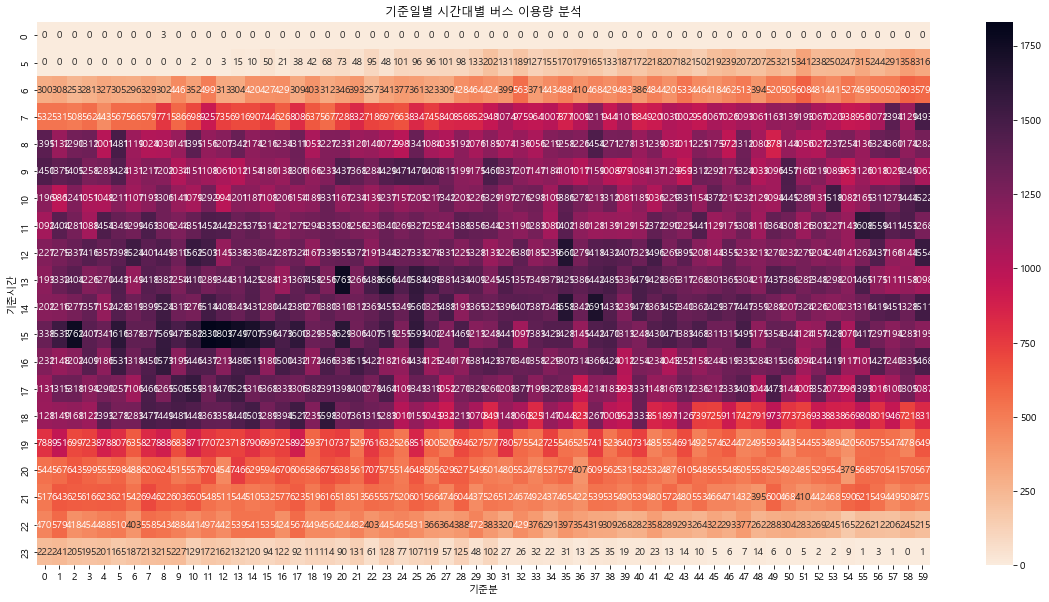

In [53]:
#그래프 그리기
plt.figure(figsize = (20, 10))

#피봇 데이터 넣어서 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap ="rocket_r")

#타이틀 넣기
plt.title("기준일별 시간대별 버스 이용량 분석" )


#보여주기
plt.show()

### 4. 기준일별 시간대별 버스내 체류시간(분)

In [61]:
df_pivot = df_bus_card_tot.pivot_table(values = "버스체류시간(분)"
                                     ,index = "기준일"
                                     ,columns = "기준시간"
                                     ,aggfunc ="mean").fillna(0)
df_pivot.head()

기준시간,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
기준일,,,,,,,,,,,,,,,,,,,,
1,0.0,21.710843,14.772246,15.277027,17.338867,15.647918,16.800000,17.109751,16.845908,17.180000,17.784550,17.393048,17.164691,16.491405,15.305273,14.370916,13.964312,12.712541,12.750865,10.153439
2,0.0,14.650000,14.558480,15.537921,16.352829,16.117812,15.932043,16.081704,16.325926,16.384711,16.154801,15.933806,15.930779,17.556646,15.693489,14.415628,13.720737,13.304262,11.972441,9.569536
3,0.0,14.554479,15.534661,15.856294,15.917237,15.894737,16.185915,15.695066,15.729352,16.070549,15.727246,15.071942,14.906297,16.061798,15.580859,13.922354,12.820016,12.872266,12.488108,10.014493
4,0.0,16.394410,15.446260,15.372460,16.575413,16.379924,16.125847,16.105281,15.920992,16.353254,16.124662,16.139505,15.471029,16.833673,15.612271,14.821986,13.865369,13.143723,12.648058,10.198864
5,0.0,15.064579,15.180672,16.056052,16.718885,16.599608,16.045854,16.135707,16.233428,16.123167,15.569634,16.084054,15.786830,16.718657,16.397681,14.632214,13.683138,12.720086,12.417462,10.651639


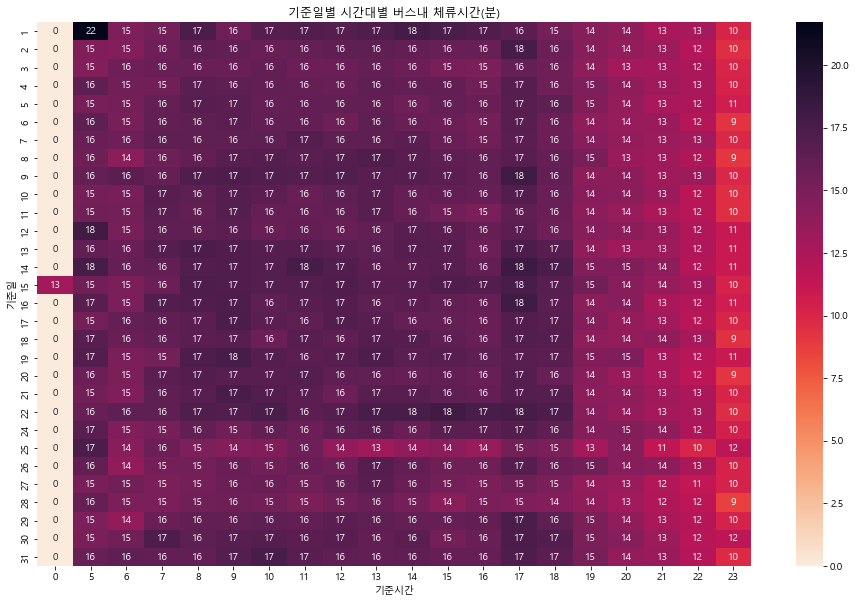

In [62]:
#그래프 그리기
plt.figure(figsize = (16, 10))

#피봇 데이터 넣어서 그래프 그리기
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap ="rocket_r")

#타이틀 넣기
plt.title("기준일별 시간대별 버스내 체류시간(분)" )


#보여주기
plt.show()

### 5. 시간대별 승객구분별 버스내 체류시간(분) 분석

In [66]:
df_temp = pd.DataFrame()

df_temp["기준시간"] = df_bus_card_tot["기준시간"]
df_temp["승객구분"] = df_bus_card_tot["승객구분"]
df_temp["버스체류시간(분)"] = df_bus_card_tot["버스체류시간(분)"]

df_temp

,기준시간,승객구분,버스체류시간(분)
0,5,일반,3
1,5,일반,34
2,5,일반,23
3,5,일반,30
4,5,일반,24
...,...,...,...
1057867,23,일반,11
1057868,23,일반,8
1057869,23,일반,1
1057870,23,일반,7


In [67]:
df_temp.drop_duplicates(["승객구분"])

,기준시간,승객구분,버스체류시간(분)
0,5,일반,3
97,6,청소년,0
133,6,None,8
265,7,어린이,7


In [71]:
df_temp2 = (df_temp.groupby(["기준시간", "승객구분"], as_index=False).sum()). \
        sort_values(by=["버스체류시간(분)"], ascending =False)

In [74]:
df_temp2.head(10).transpose()

,43,39,35,31,27,51,19,47,23,15
기준시간,15,14,13,12,11,17,9,16,10,8
승객구분,일반,일반,일반,일반,일반,일반,일반,일반,일반,일반
버스체류시간(분),1252395,1228199,1219021,1184269,1175996,1153803,1146414,1128590,1126060,1113955


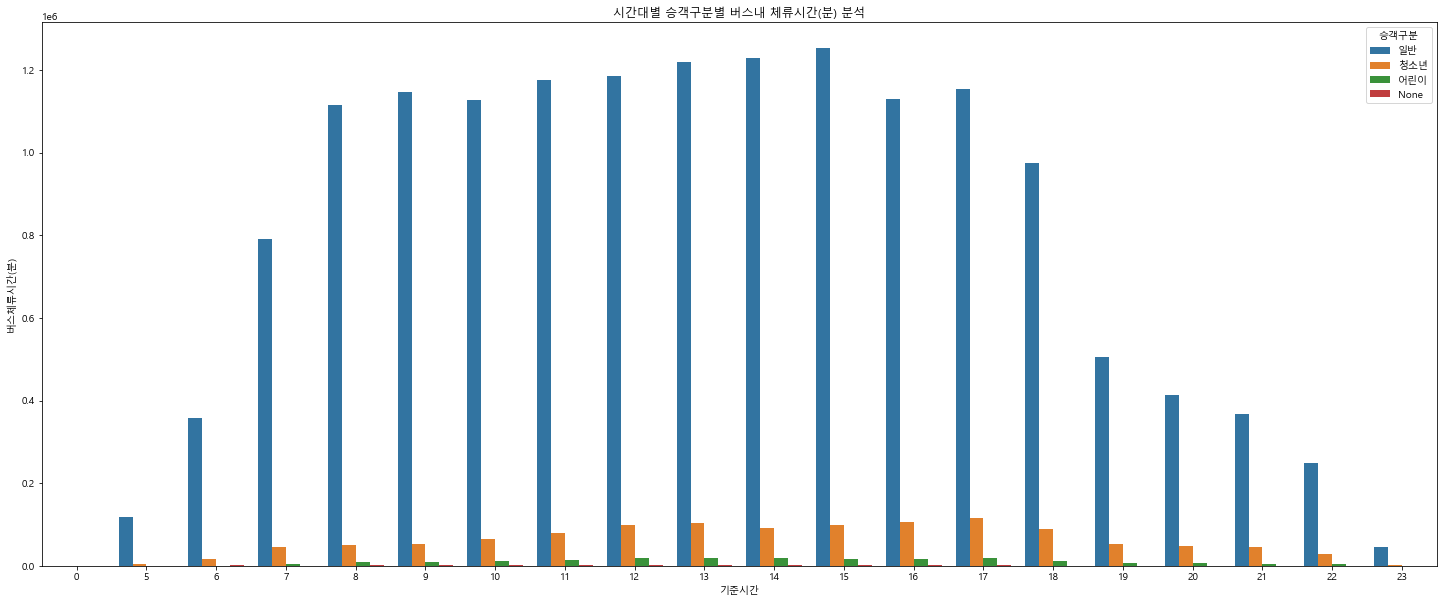

In [87]:
fig = plt.figure(figsize =(25,10))
sns.barplot(x="기준시간", y = "버스체류시간(분)", hue = "승객구분", data=df_temp2)
plt.title("시간대별 승객구분별 버스내 체류시간(분) 분석")
plt.show()

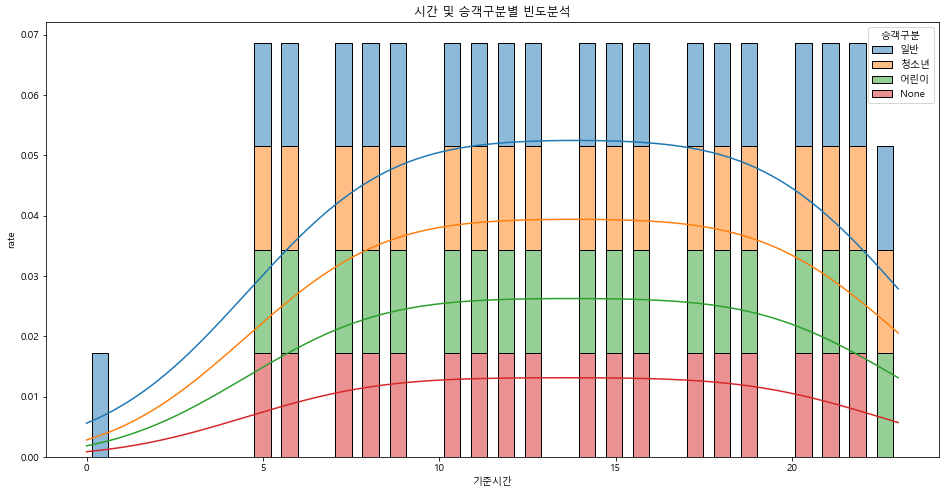

In [86]:
# 시간 및 승객구분별 빈도분석
plt.figure(figsize = (16, 8))
g = sns.histplot(data = df_temp2
                , x = "기준시간"
                , bins = 30 #bin 개수
                , kde = True #밀도선 여부
                , hue = "승객구분"
                , multiple = "stack" #dodge/비율로 확인하고자 할 때
                , stat = "density"
                , shrink = 0.6)
plt.title("시간 및 승객구분별 빈도분석")
plt.xlabel("기준시간")
plt.ylabel("rate")
plt.show()

# 6. 승하차정류장별 버스내 체류시간(분)

In [93]:
df_tmep = pd.DataFrame()

df_temp["승하차정류장"] = df_bus_card_tot["승차정류장"] + "-->" + \
                                        df_bus_card_tot["하차정류장"]
df_temp["승객구분"] = df_bus_card_tot["승객구분"]
df_temp["버스내체류시간"] = df_bus_card_tot["버스체류시간(분)"]

In [94]:
df_temp.head()

,기준시간,승객구분,버스체류시간(분),승하차정류장,버스내체류시간
0,5,일반,3,문덕사거리-->성우오토모티브,3
1,5,일반,34,준양주택3차-->오거리,34
2,5,일반,23,두호동주민센터-->남구보건소,23
3,5,일반,30,천마아파트-->홈플러스,30
4,5,일반,24,오천농협세계지점-->죽도시장,24


In [97]:
#승차정류장 및 하차정류장별 버스내체류시간 상위 30 조회
df_temp_sel = (df_temp.groupby(["승하차정류장", "승객구분"]
                               , as_index=False).sum()).sort_values(by=["버스내체류시간"]
                                , ascending=False).head(30)

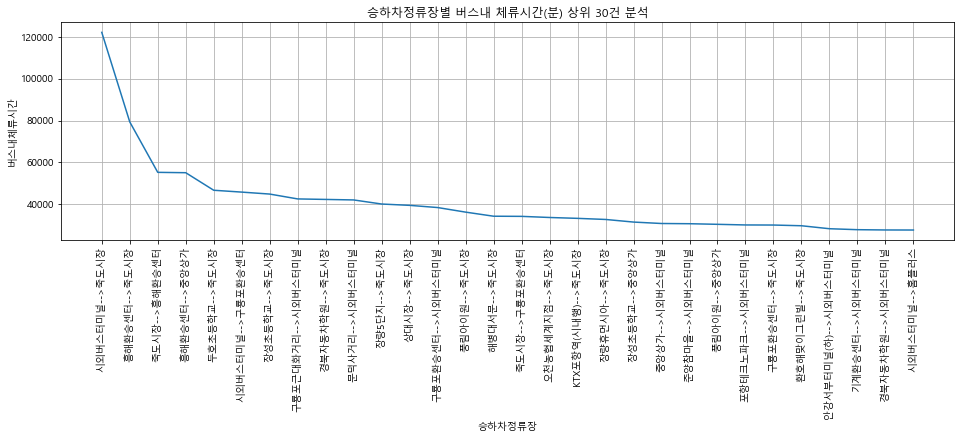

In [101]:
plt.figure(figsize = (16, 4))
plt.plot(df_temp_sel["승하차정류장"], df_temp_sel["버스내체류시간"])
plt.title("승하차정류장별 버스내 체류시간(분) 상위 30건 분석")
plt.xlabel("승하차정류장")
plt.ylabel("버스내체류시간")
plt.xticks(rotation=90) #글자 회전
plt.grid(True)
plt.show()

In [ ]:
ㅇ